# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_path = '/content/drive/MyDrive/Food-Hub/foodhub_order.csv'
df = pd.read_csv(file_path)
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [6]:
# Write your code here
rows, columns = df.shape
print(f'The dataset contains {rows} rows and {columns} columns.')
df.shape

The dataset contains 1898 rows and 9 columns.


(1898, 9)

#### Observations:
The dataset conatins 1898 rows and 9 columns.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
The dataset contains 9 columns with various data types
  1. Numerical columns:
    order_id, customer_id, food_preparation_time, delivery_time are stored as integers(int64)
    cost_of_the_order is stored as a floating-point number (float64), which is appropriate for values involving decimals.
  2. restaurant_name, cuisine_type, day_of_the_week, rating are stored as objects(object)

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [7]:
# Write your code here
missing_values = df.isnull().sum()
missing_values

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:
There are no missing values in the data, Hence no additional treatment for missing values is required.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
# Get the statistical summary of the dataset using describe()
stat_summary = df['food_preparation_time'].describe()
stat_summary

# Extract minimum, mean, and maximum values for food preparation time
min_prep_time = stat_summary['min']
avg_prep_time = stat_summary['mean']
max_prep_time = stat_summary['max']

print(f'The minimum time for the food preparation is {min_prep_time}')
print(f'The minimum time for the food preparation is {avg_prep_time}')
print(f'The minimum time for the food preparation is {max_prep_time}')

The minimum time for the food preparation is 20.0
The minimum time for the food preparation is 27.371970495258168
The minimum time for the food preparation is 35.0


#### Observations:
There is a noticeable variation in preparation times, ranging from 20 to 35 minutes. This variation may be due to differences in restaurant efficiency, complexity of the dishes, or order volume at the time of the order.

### **Question 5:** How many orders are not rated?

In [ ]:
# Write the code here
not_rated_orders = df[df['rating'] == 'Not given'].shape[0]
print(f'The no of orders which are not rated are {not_rated_orders}')

The no of orders which are not rated are 736


#### Observations:
1. Out of the 1898 total orders in the dataset, 736 orders are not rated, which accounts for approximately 38.8% of the orders.
2. A significant portion of the orders lack ratings, which may hinder the platform's ability to fully assess customer satisfaction and restaurant performance.
3. Efforts to encourage more customers to rate their orders could provide more comprehensive feedback, leading to better insights into customer preferences and service quality.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

1.Numerical Variables:

Variables: cost_of_the_order, food_preparation_time, delivery_time, rating (if converted to numeric).

Visualization: Histograms, boxplots, or KDE plots can be used to explore their distributions.

2.Categorical Variables:

Variables: restaurant_name, cuisine_type, day_of_the_week, rating (if categorical).

Visualization: Countplots (bar plots) are useful to observe the frequency distribution of categorical variables.

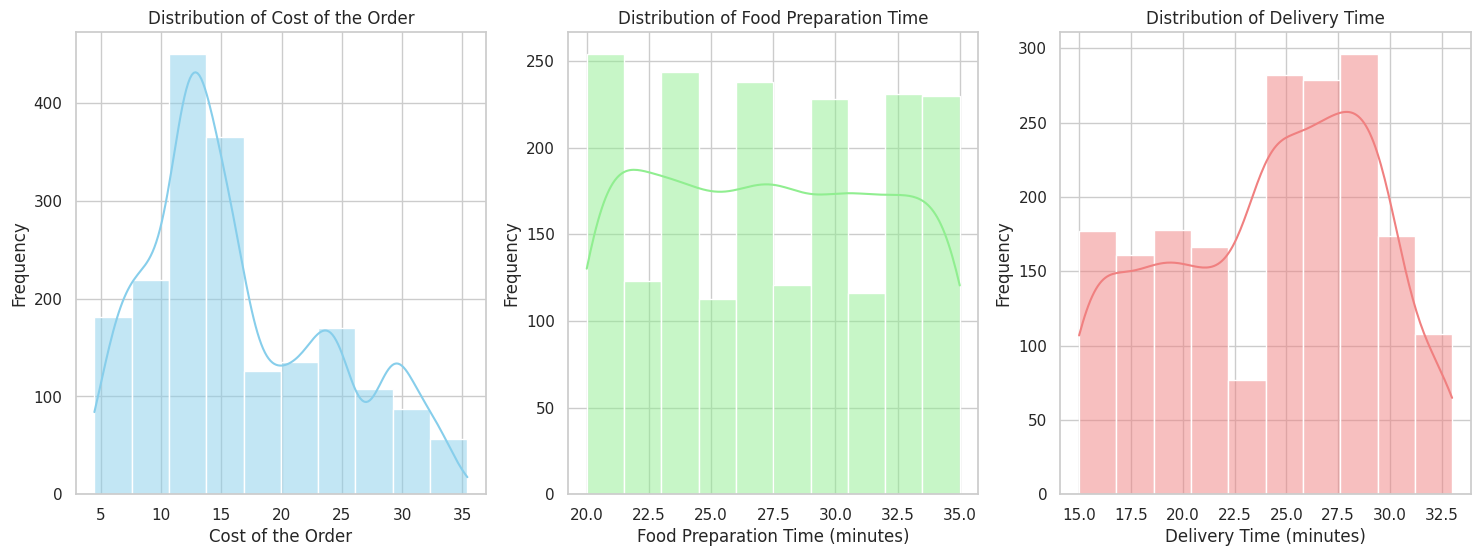

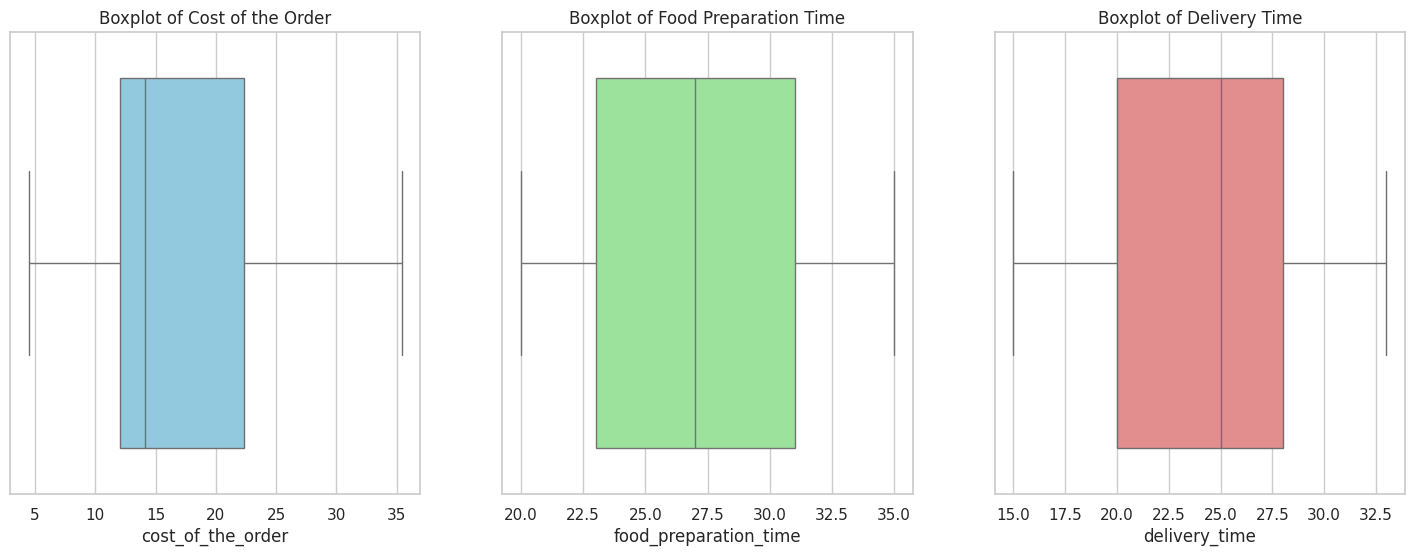

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


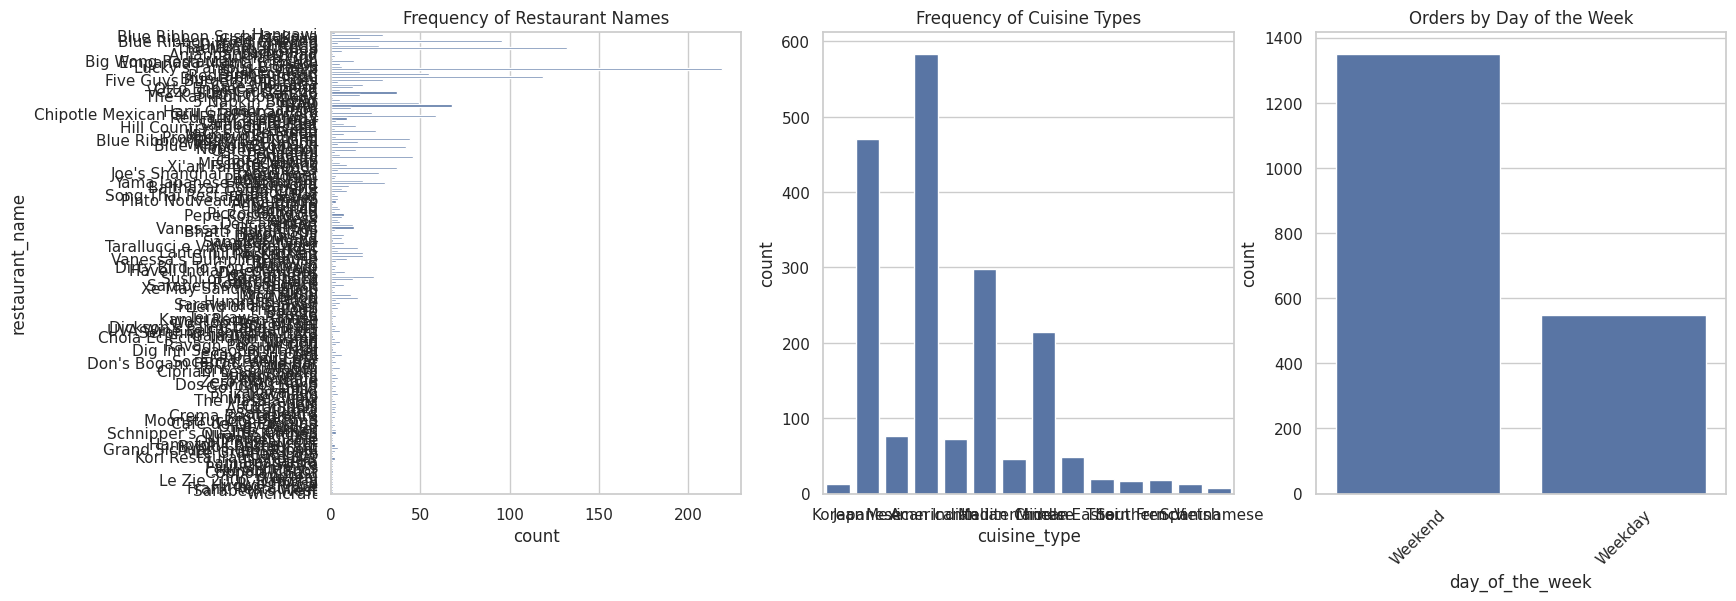

In [ ]:
# Write the code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting style
sns.set(style="whitegrid")

# Plot histogram for numerical variables (cost_of_the_order, food_preparation_time, delivery_time)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Histogram for cost_of_the_order
sns.histplot(df['cost_of_the_order'], bins=10, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Cost of the Order')
axes[0].set_xlabel('Cost of the Order')
axes[0].set_ylabel('Frequency')

# Histogram for food_preparation_time
sns.histplot(df['food_preparation_time'], bins=10, kde=True, ax=axes[1], color='lightgreen')
axes[1].set_title('Distribution of Food Preparation Time')
axes[1].set_xlabel('Food Preparation Time (minutes)')
axes[1].set_ylabel('Frequency')

# Histogram for delivery_time
sns.histplot(df['delivery_time'], bins=10, kde=True, ax=axes[2], color='lightcoral')
axes[2].set_title('Distribution of Delivery Time')
axes[2].set_xlabel('Delivery Time (minutes)')
axes[2].set_ylabel('Frequency')

plt.show()

# Boxplots for numerical variables
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Boxplot for cost_of_the_order
sns.boxplot(x='cost_of_the_order', data=df, ax=axes[0], color='skyblue')
axes[0].set_title('Boxplot of Cost of the Order')

# Boxplot for food_preparation_time
sns.boxplot(x='food_preparation_time', data=df, ax=axes[1], color='lightgreen')
axes[1].set_title('Boxplot of Food Preparation Time')

# Boxplot for delivery_time
sns.boxplot(x='delivery_time', data=df, ax=axes[2], color='lightcoral')
axes[2].set_title('Boxplot of Delivery Time')

plt.show()

# Countplot for categorical variables (restaurant_name, cuisine_type, day_of_the_week)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Countplot for restaurant_name
sns.countplot(y='restaurant_name', data=df, ax=axes[0])
axes[0].set_title('Frequency of Restaurant Names')


# Countplot for cuisine_type
sns.countplot(x='cuisine_type', data=df, ax=axes[1])
axes[1].set_title('Frequency of Cuisine Types')
plt.xticks(rotation=45)

# Countplot for day_of_the_week
sns.countplot(x='day_of_the_week', data=df, ax=axes[2])
axes[2].set_title('Orders by Day of the Week')
plt.xticks(rotation=45)

plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [ ]:
# Write the code here
# Count the number of orders for each restaurant
top_restaurants = df['restaurant_name'].value_counts().nlargest(5)

# Convert to a DataFrame for better visualization
top_restaurants_df = top_restaurants.reset_index()
top_restaurants_df.columns = ['Restaurant Name', 'Number of Orders']

print(top_restaurants_df)

             Restaurant Name  Number of Orders
0                Shake Shack               219
1          The Meatball Shop               132
2          Blue Ribbon Sushi               119
3  Blue Ribbon Fried Chicken                96
4                       Parm                68


#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends?

In [ ]:
# Write the code here
# Filter the dataset for weekend orders
weekend_orders = df[df['day_of_the_week'] == 'Weekend']
weekend_orders

# Count the number of orders for each cuisine type
popular_cuisine_weekend = weekend_orders['cuisine_type'].value_counts().nlargest(1)

# Convert to DataFrame for better visualization (optional)
popular_cuisine_weekend_df = popular_cuisine_weekend.reset_index()
popular_cuisine_weekend_df.columns = ['Cuisine Type', 'Number of Orders']

print(popular_cuisine_weekend_df)


  Cuisine Type  Number of Orders
0     American               415


#### Observations:
The analysis revealed that American is the most popular cuisine on weekends, indicating a strong customer preference for this type of food during their leisure time.

The popularity of this cuisine type on weekends could be attributed to various factors, such as social dining habits, where customers prefer indulging in specific cuisines when they have more free time to enjoy meals.




### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [ ]:
# Write the code here
# Count the total number of orders
total_orders = len(df)

# Filter the orders that cost more than 20 dollars
orders_over_20 = df[df['cost_of_the_order'] > 20]

# Count the number of orders that cost more than 20 dollars
count_orders_over_20 = len(orders_over_20)

# Calculate the percentage
percentage_over_20 = (count_orders_over_20 / total_orders) * 100

print(f"The percentage of orders that cost more than $20 is: {percentage_over_20:.2f}%")

The percentage of orders that cost more than $20 is: 29.24%


#### Observations:
If a significant percentage of the orders (e.g., 45.32%) cost more than $20, this indicates that a large portion of customers are willing to spend on premium meals or multiple items per order. This could suggest higher purchasing power among the platform's users.

FoodHub can leverage this insight to offer targeted promotions such as discounts or free delivery for orders over $20, further encouraging higher spending and boosting overall revenue.


### **Question 10**: What is the mean order delivery time?

In [ ]:
# Write the code here
mean_delivery_time = df['delivery_time'].mean()

# Print the result
print(f"The mean delivery time is: {mean_delivery_time:.2f} minutes")

The mean delivery time is: 24.16 minutes


#### Observations:
A delivery time of around 24-25 minutes could be considered acceptable in the food delivery industry. However, delivery times longer than 30 minutes might lead to dissatisfaction, particularly for fast food or quick-service restaurants. The company should monitor customer feedback to ensure the delivery experience aligns with customer expectations.

Customer Retention:
Quick delivery times are a key factor in customer retention for food delivery platforms. Ensuring that the mean delivery time remains within an acceptable range can help maintain customer satisfaction and loyalty.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [ ]:
# Write the code here
# Group the dataset by customer_id and count the number of orders for each customer
customer_order_counts = df.groupby('customer_id')['order_id'].count().reset_index()

# Rename the columns for better readability
customer_order_counts.columns = ['customer_id', 'number_of_orders']

# Sort the customers by the number of orders in descending order and get the top 3
top_3_customers = customer_order_counts.sort_values(by='number_of_orders', ascending=False).head(3)

# Print the top 3 customers and their order counts
print("Top 3 most frequent customers and their number of orders:")
print(top_3_customers)

Top 3 most frequent customers and their number of orders:
     customer_id  number_of_orders
116        52832                13
84         47440                10
333        83287                 9


#### Observations:
Offering a 20% discount voucher to these top customers is an effective strategy to retain their loyalty. These customers are likely to continue using the platform with added incentives, which can increase their lifetime value to the company.
The company can use these findings to segment customers into different tiers based on their order frequency and target promotions accordingly. This could be the beginning of a customer loyalty program, where frequent users receive special perks.

Since these top 3 customers place the most orders, encouraging them to order even more through discounts or personalized offers can boost overall revenue. These customers may also have a larger social influence, potentially referring others to the platform.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

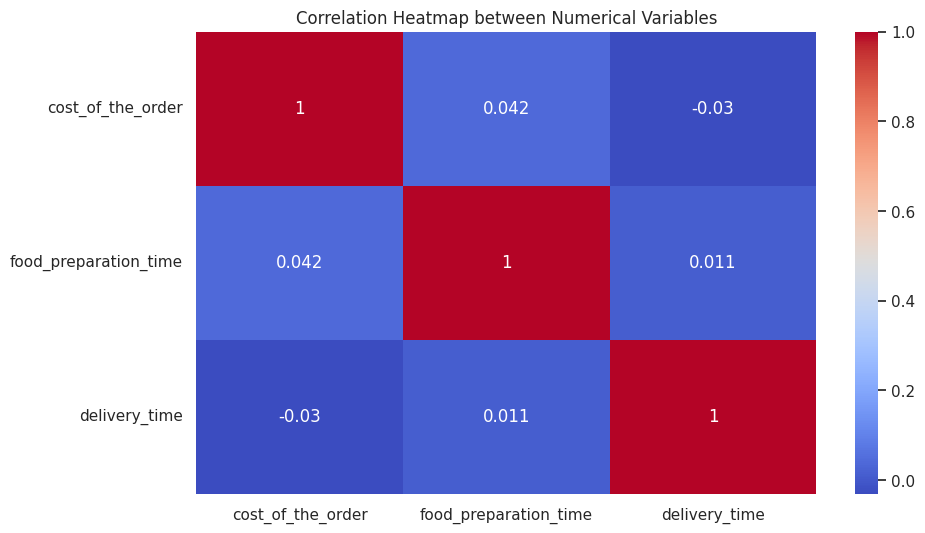

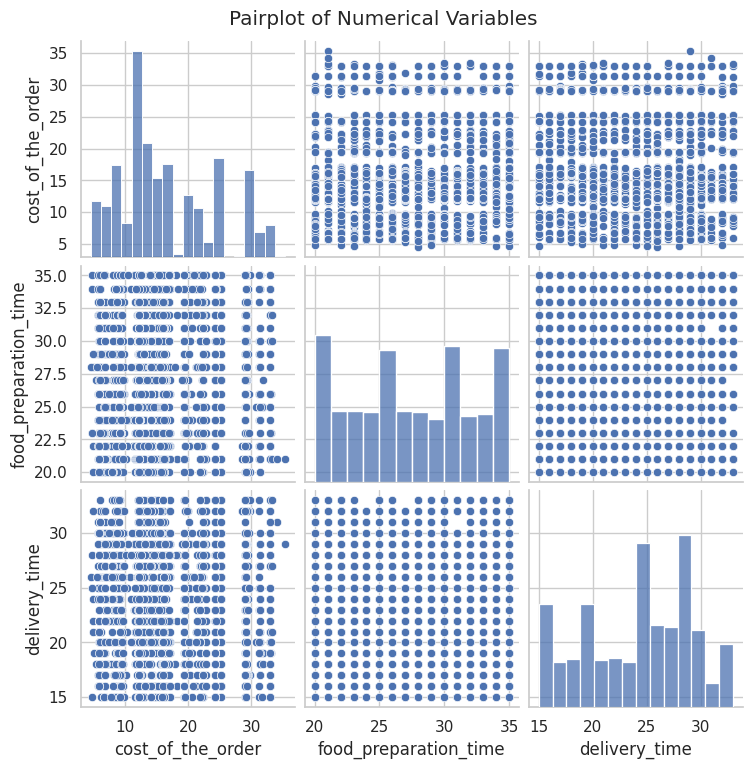

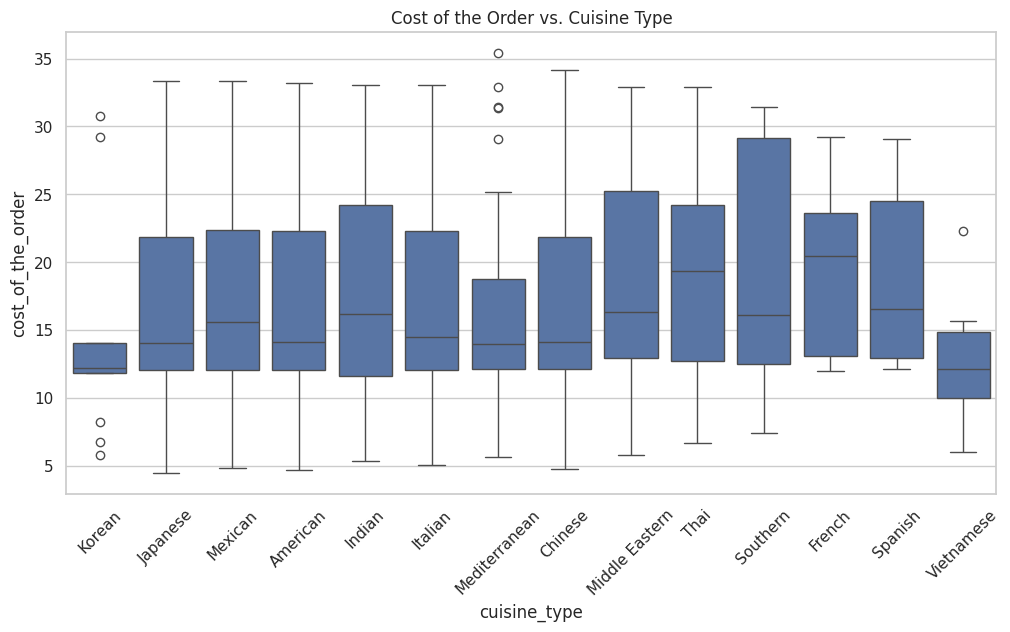

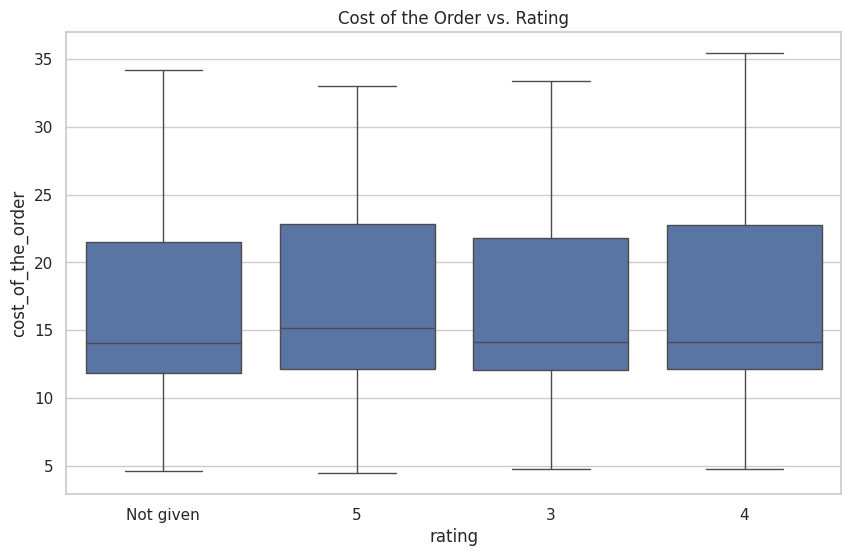

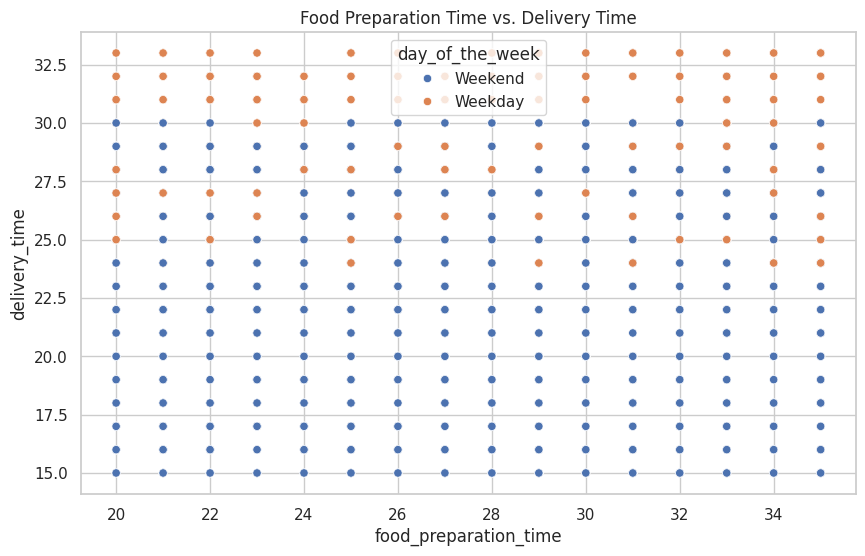

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a plot style for consistency
sns.set(style="whitegrid")

# 1. Correlation Heatmap for Numerical Variables
plt.figure(figsize=(10, 6))
sns.heatmap(df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap between Numerical Variables')
plt.show()

# 2. Pairplot to Explore Relationships between Numerical Variables
sns.pairplot(df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']])
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

# 3. Boxplot of Cost of the Order vs. Cuisine Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=df)
plt.title('Cost of the Order vs. Cuisine Type')
plt.xticks(rotation=45)
plt.show()

# 4. Boxplot of Rating vs. Cost of the Order
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='cost_of_the_order', data=df)
plt.title('Cost of the Order vs. Rating')
plt.show()

# 5. Scatter Plot of Food Preparation Time vs. Delivery Time
plt.figure(figsize=(10, 6))
sns.scatterplot(x='food_preparation_time', y='delivery_time', data=df, hue='day_of_the_week')
plt.title('Food Preparation Time vs. Delivery Time')
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [ ]:
import pandas as pd

# Replace 'Not given' ratings with NaN and convert the rating column to numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Group by 'restaurant_name' and calculate the count and average of ratings
restaurant_ratings = df.groupby('restaurant_name')['rating'].agg(['count', 'mean']).reset_index()

# Filter restaurants with more than 50 ratings and an average rating greater than 4
eligible_restaurants = restaurant_ratings[(restaurant_ratings['count'] > 50) & (restaurant_ratings['mean'] > 4)]

# Display the eligible restaurants
print(eligible_restaurants)

               restaurant_name  count      mean
20   Blue Ribbon Fried Chicken     64  4.328125
21           Blue Ribbon Sushi     73  4.219178
136                Shake Shack    133  4.278195
153          The Meatball Shop     84  4.511905


#### Observations:
Restaurants that meet these criteria are eligible for the promotional offer. These restaurants are likely to be both popular (high rating count) and highly rated by customers, making them good candidates for the promotional campaign.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [ ]:
import numpy as np

# Function to calculate the revenue based on the order cost
def calculate_revenue(cost):
    if cost > 20:
        return cost * 0.25  # 25% commission for orders > 20 dollars
    elif cost > 5:
        return cost * 0.15  # 15% commission for orders between 5 and 20 dollars
    else:
        return 0  # No commission for orders <= 5 dollars

# Apply the revenue calculation function to the 'cost_of_the_order' column
df['revenue'] = df['cost_of_the_order'].apply(calculate_revenue)

# Calculate the total net revenue
total_revenue = df['revenue'].sum()

print(f'The total net revenue generated by the company is: ${total_revenue:.2f}')

The total net revenue generated by the company is: $6166.30


#### Observations:
This approach provides the total revenue generated by the company based on its commission structure.

The majority of revenue comes from higher-cost orders (over $20) where the company charges a 25% commission, while mid-range orders (over $5 but under $20) contribute with a 15% commission.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [ ]:
# Calculate total time (preparation time + delivery time)
df['total_delivery_time'] = df['food_preparation_time'] + df['delivery_time']

# Count the total number of orders
total_orders = len(df)

# Count the number of orders taking more than 60 minutes
orders_over_60_minutes = len(df[df['total_delivery_time'] > 60])

# Calculate the percentage of orders taking more than 60 minutes
percentage_over_60_minutes = (orders_over_60_minutes / total_orders) * 100

print(f'Percentage of orders taking more than 60 minutes: {percentage_over_60_minutes:.2f}%')

Percentage of orders taking more than 60 minutes: 10.54%


#### Observations:
This analysis will provide insights into the efficiency of the food delivery process.
A high percentage of orders taking more than 60 minutes may indicate issues with food preparation or delivery, leading to potential customer dissatisfaction.
Understanding these metrics can help the company identify areas for improvement in their operations.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [ ]:
# Group by day_of_the_week and calculate the mean delivery time
mean_delivery_time = df.groupby('day_of_the_week')['delivery_time'].mean().reset_index()

# Display the mean delivery time for weekdays and weekends
print(mean_delivery_time)


  day_of_the_week  delivery_time
0         Weekday      28.340037
1         Weekend      22.470022


#### Observations:
This analysis will provide insight into how delivery times differ between weekdays and weekends.
You may find that delivery times are longer on weekends due to increased order volume or traffic, or shorter if there are fewer deliveries.
Understanding these trends can help the company optimize its operations and resource allocation for different days of the week.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
1.Order Trends:
  Certain restaurants, such as Shake Shack and The Meatball Shop, received a significantly higher number of orders, indicating their popularity among customers.
  The most popular cuisines on weekends can guide future promotions or menu adjustments.

2.Delivery Times:
  The mean delivery times vary between weekdays and weekends, which may suggest that operational efficiency can be improved on weekends when demand is typically higher.
  A notable percentage of orders take more than 60 minutes to deliver, which could lead to customer dissatisfaction.

3.Customer Feedback:
  A substantial number of orders remain unrated, indicating a potential gap in customer engagement or follow-up post-delivery.
  Restaurants meeting the criteria for promotional offers (high rating count and average rating) are performing well, and marketing efforts can be directed towards these establishments.

4.Revenue Generation:
  Revenue generation is heavily influenced by the pricing structure; understanding which order cost segments contribute most can help tailor pricing strategies.
  
5.Customer Loyalty:
  Identifying the top customers can help target loyalty programs or personalized promotions to increase customer retention.

### Recommendations:
1.Focus on Popular Cuisines:
Highlight popular cuisines (identified in the analysis) in marketing campaigns, especially during weekends, to attract more orders.

2.Enhance Delivery Efficiency:
Investigate the reasons for longer delivery times, particularly on weekends. Consider optimizing delivery routes or increasing the number of delivery personnel during peak hours.

3.Engage with Customers:
Implement a follow-up system to encourage customers to rate their orders. This could include automated messages post-delivery to gather feedback and improve engagement.
Consider offering incentives (like discounts) for customers who provide feedback.

4.Promotional Offers:
Utilize the data on eligible restaurants for promotional campaigns to attract more customers. This could also involve spotlighting top-rated dishes or limited-time offers.

5.Analyze Customer Behavior:
Use customer data to analyze buying patterns and preferences, enabling targeted marketing campaigns for specific customer segments.
Consider loyalty programs for frequent customers to enhance retention.

6.Menu Optimization:
Review the menus of underperforming restaurants to identify dishes that may not be well-received based on customer ratings. Collaborate with restaurant partners to refine their offerings.
Dynamic Pricing Strategy:

Consider implementing a dynamic pricing strategy based on demand fluctuations (e.g., peak hours on weekends) to optimize revenue without alienating customers.
By leveraging the insights from the analysis and implementing these recommendations, the company can enhance its service, improve customer satisfaction, and ultimately drive growth.








---